   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


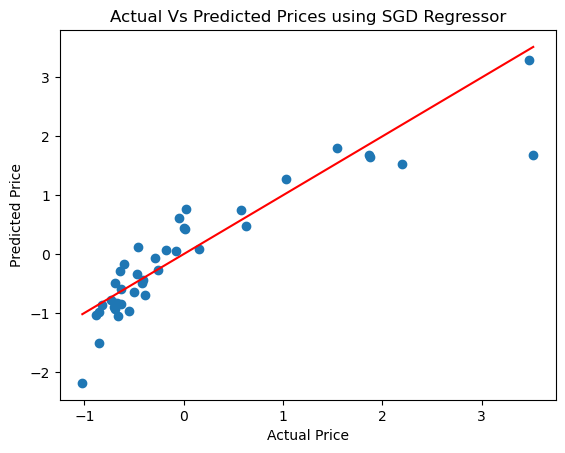

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("CarPrice_Assignment.csv")
print(data.head())
print(data.info())

data = data.drop(['car_ID' , 'CarName'], axis = 1)
data = pd.get_dummies(data, drop_first = True)

X = data.drop('price',axis = 1)
y = data['price']
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(np.array(y).reshape(-1,1))
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size =0.2,random_state = 42)
sgd_model = SGDRegressor(max_iter = 1000, tol=1e-3)
sgd_model.fit(X_train ,y_train)
y_pred =sgd_model.predict(X_test)

mse  = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test , y_pred)

print("Name: gowtham u")
print("Reg. No: 25005013")
print(f"{'MSE':}:{mean_squared_error(y_test,y_pred):}")
print(f"{'MAE':}:{mean_absolute_error(y_test,y_pred):}")
print(f"{'R-square':}:{r2_score(y_test,y_pred):}")

print("\nModel Coeffients: ")
print("Coefficient:", sgd_model.coef_)
print("Intercept:", sgd_model.intercept_)

plt.scatter(y_test , y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted Prices using SGD Regressor")
plt.plot([min(y_test) , max(y_test)], [min(y_test) , max(y_test)], color = 'red')